# Student Performance - командная работа Смолягина Данилы и Худякова Руслана

## Постановка задачи
Провести разведочный анализ данных, построить и обучить три модели регрессии.

## Подключение модулей

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [278]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Загрузка данных

In [281]:
df = pd.read_csv('Student_Performance.csv')

In [283]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Описание данных

Признаки:
- Hours Studied: общее количество часов, затраченных на учебу каждым студентом.
- Previous Scores: Баллы, полученные учащимися в предыдущих тестах.
- Extracurricular Activities: Участвует ли учащийся во внеклассных мероприятиях (Да или Нет).
- Sleep Hours: Среднее количество часов сна учащегося в день.
- Sample Question Papers Practiced: Количество образцов вопросов на практике, которые практиковал студент.

Целевая переменная:
- Performance Index: Показатель общей успеваемости каждого учащегося. Индекс успеваемости представляет собой академическую успеваемость учащегося и округлен до ближайшего целого числа. Индекс колеблется от 10 до 100, при этом более высокие значения указывают на лучшую производительность.

In [286]:
df.shape

(10000, 6)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [290]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [292]:
df.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


### Предварительная обработка данных

In [295]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [297]:
# проверка на дублирующие записи
df.duplicated().sum()

127

In [299]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [301]:
df.duplicated().sum()

0

In [303]:
df.shape

(9873, 6)

### Разведочный анализ данных (EDA)

<Axes: ylabel='proportion'>

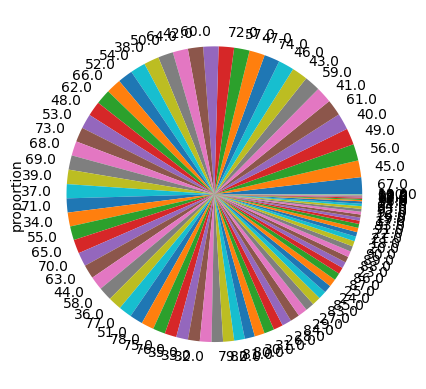

In [306]:
df['Performance Index'].value_counts(normalize=True).plot.pie()

<Axes: xlabel='Hours Studied'>

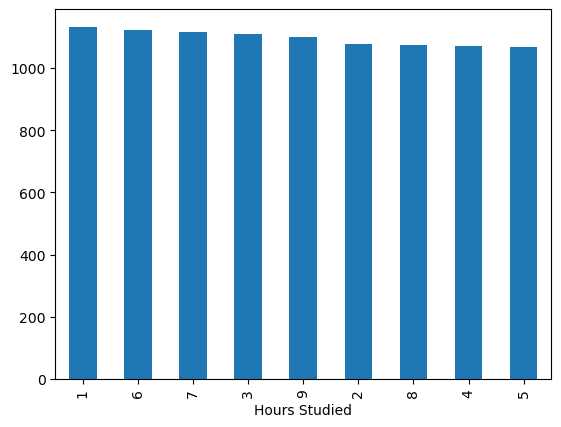

In [308]:
df['Hours Studied'].value_counts(normalize=False).plot.bar()

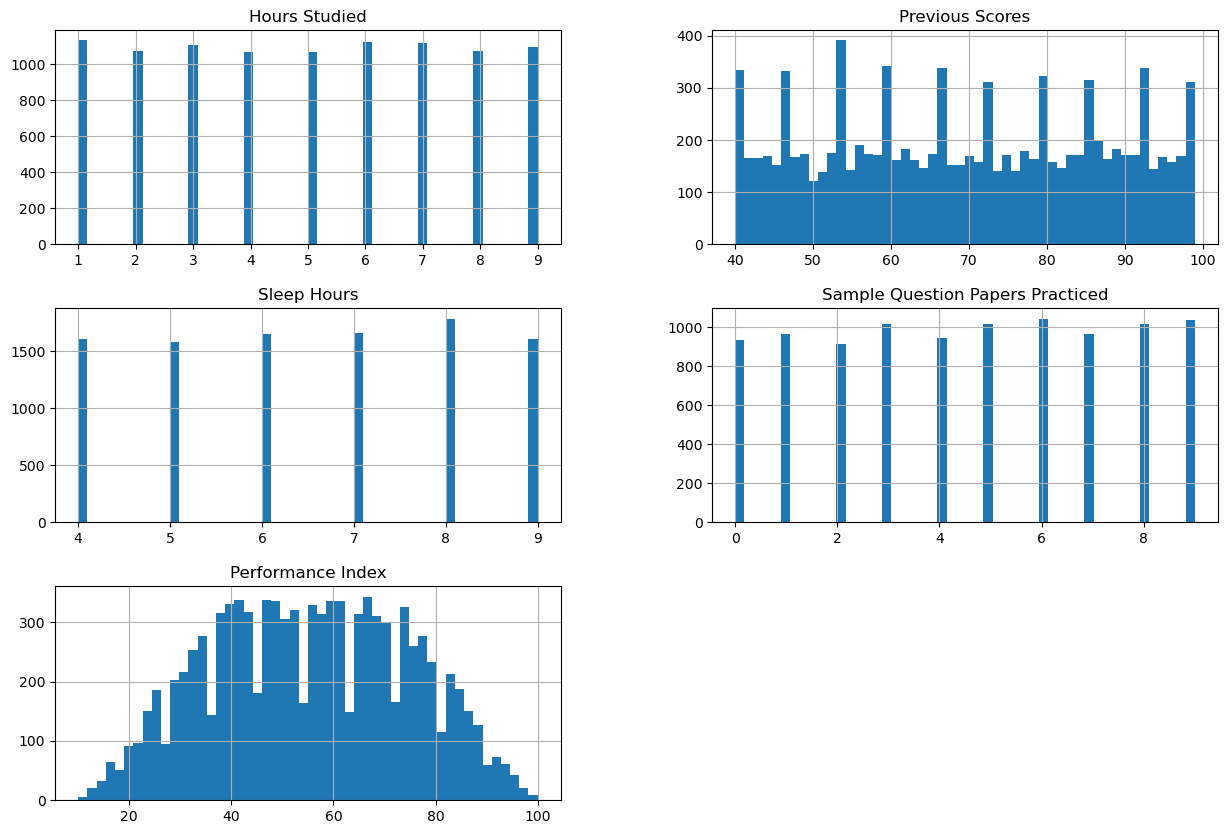

In [310]:
df.hist(figsize = (15,10), bins = 50);

<Figure size 1000x800 with 0 Axes>

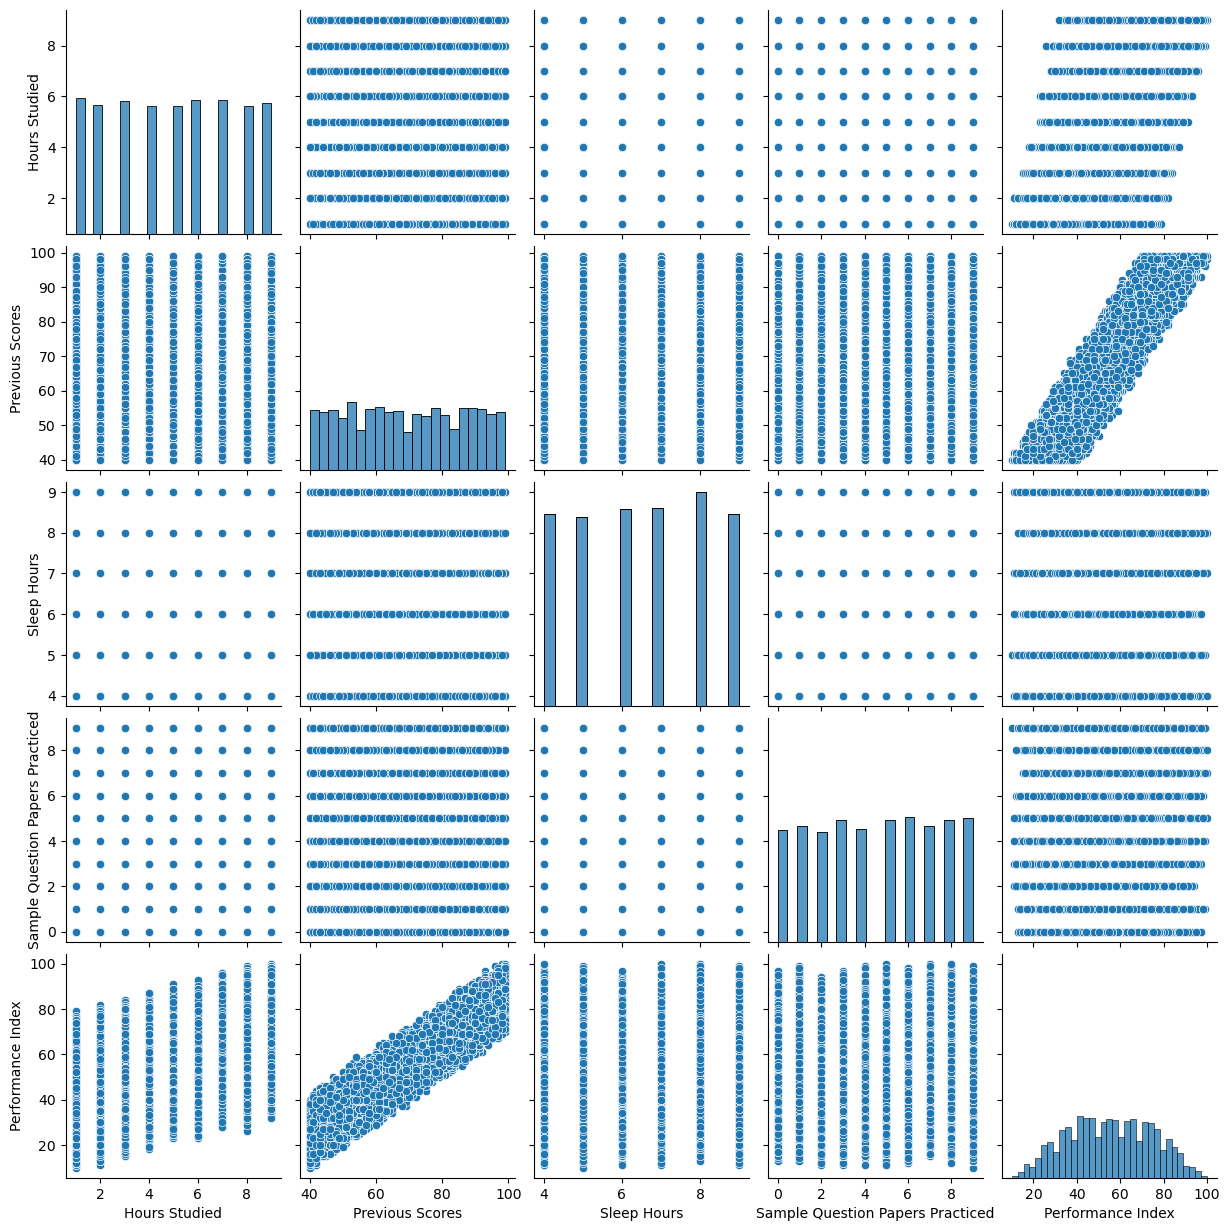

In [312]:
plt.figure(figsize=(10,8))
sns.pairplot(df)

<Axes: xlabel='Performance Index', ylabel='Density'>

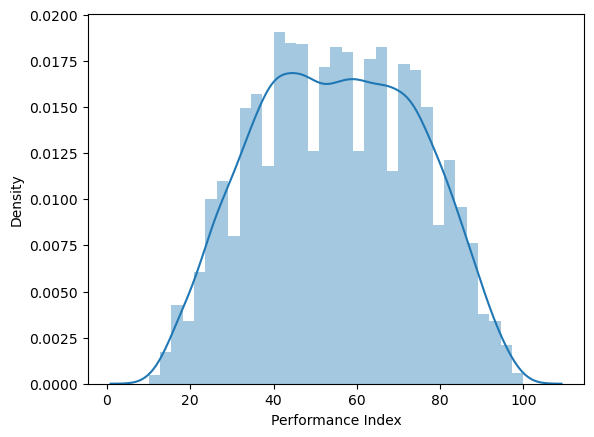

In [314]:
sns.distplot(df['Performance Index'])

<Axes: xlabel='Performance Index', ylabel='Previous Scores'>

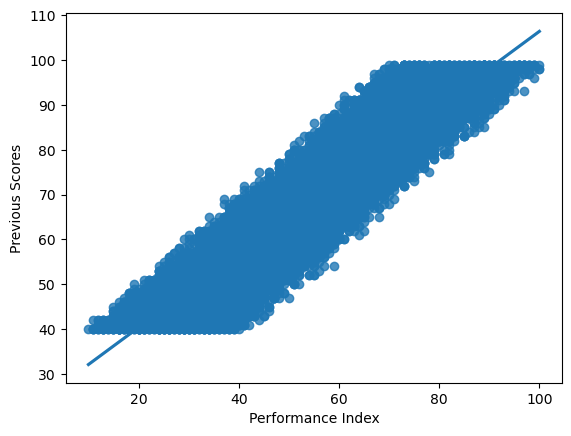

In [316]:
sns.regplot(y='Previous Scores', x='Performance Index', data=df)

In [318]:
# Какие это значения?
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [320]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':0, 'No':1})

In [322]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0,9,1,91.0
1,4,82,1,4,2,65.0
2,8,51,0,7,2,45.0
3,5,52,0,5,2,36.0
4,7,75,1,8,5,66.0


In [324]:
# список признаков для анализа
df_corr = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

In [326]:
# матрица корреляций
corr = df[df_corr].corr()
corr

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,-0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,-0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,-0.004899,-0.009534,1.000000,0.024008,-0.013839,-0.026075
Sleep Hours,0.002131,0.007975,0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,-0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,-0.026075,0.050352,0.043436,1.000000


<Axes: >

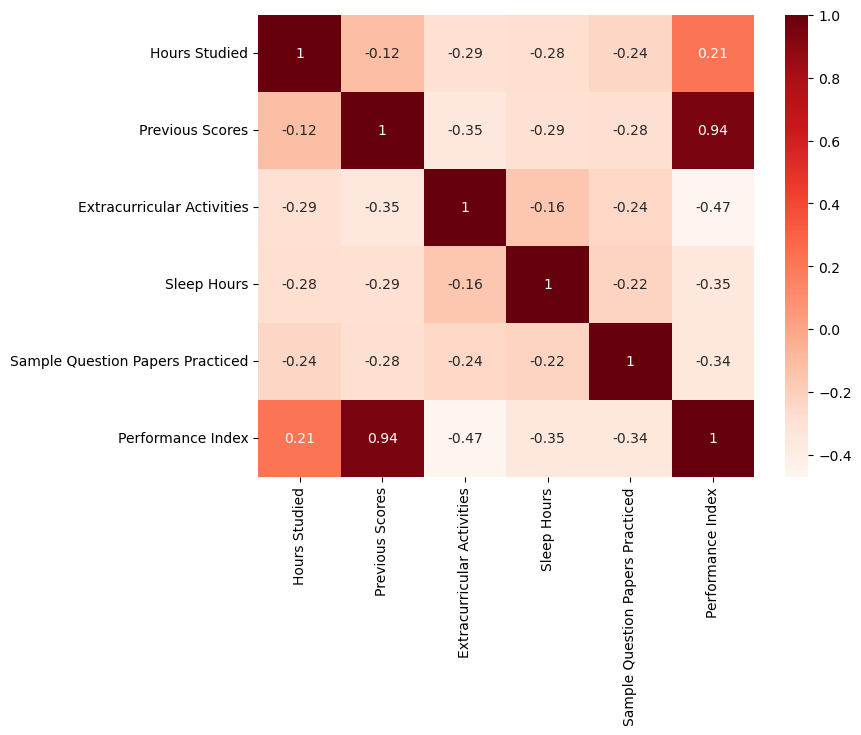

In [328]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.corr(), annot=True, cmap='Reds')
# sns.heatmap(corr.corr(), annot=True)

#### Промежуточный вывод
Построив тепловую карту корреляций можно сделать промежуточный вывод.

На карте виднеется зависимость между двумя признаками: Perfomance Index и Previous Scores. 

И слабая зависимость между Perfomance Index и Hours Studied


### Обучение моделей регрессий

In [333]:
# подготовка данных для обучения моделей
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [335]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]

In [337]:
y = df['Performance Index']

In [339]:
from sklearn.model_selection import train_test_split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [344]:
from sklearn.linear_model import LinearRegression

In [346]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [348]:
pred_train_lrm = lrm.predict(X_train)
pred_test_lrm = lrm.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train_lrm):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test_lrm):.2f}')

Train R2 0.99
Test R2 0.99


In [350]:
predictions_lrm = lrm.predict(X_test)
predictions_lrm

array([46.47091936, 80.24923008, 61.02996578, ..., 29.51491428,
       51.34505597, 64.87860811])

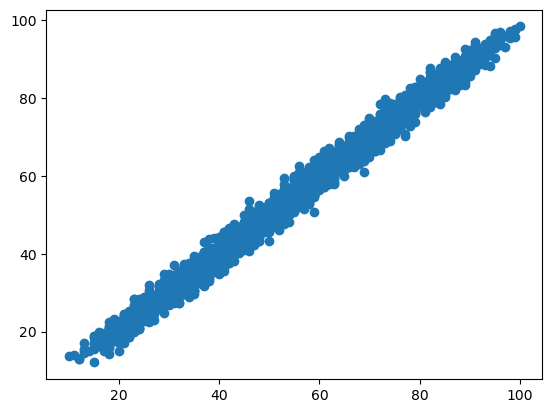

In [352]:
plt.scatter(y_test, predictions_lrm)

<Axes: xlabel='Performance Index'>

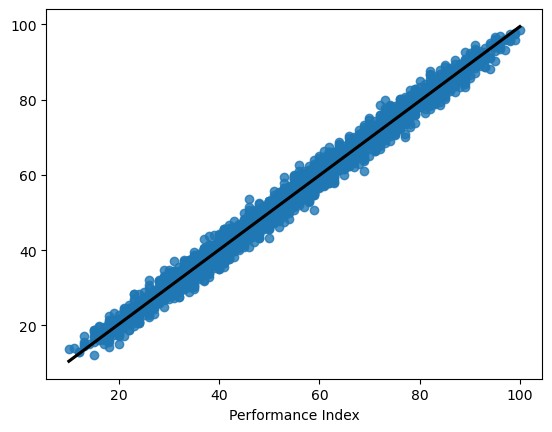

In [354]:
sns.regplot(x=y_test,y=predictions_lrm,line_kws={"color":"black"})

<Axes: xlabel='Performance Index', ylabel='Density'>

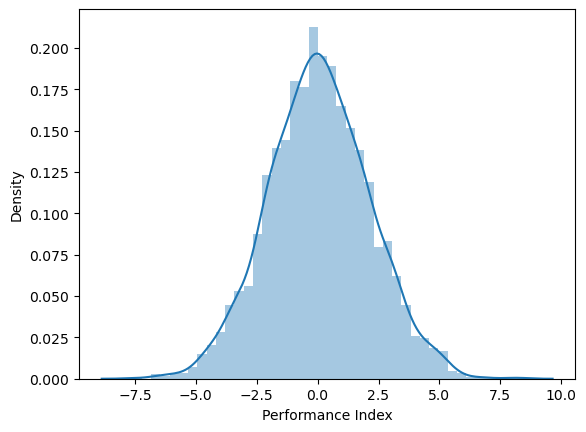

In [356]:
sns.distplot((y_test - predictions_lrm))

In [439]:
from sklearn import metrics

In [441]:
results_df_lr = pd.DataFrame(data=[["Linear Regression", 
                                 metrics.mean_absolute_error(y_test, predictions_lrm), 
                                 metrics.mean_squared_error(y_test, predictions_lrm), 
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_lrm)),
                                 metrics.r2_score(y_test, predictions_lrm)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2Score'])

In [443]:
results_df_lr

,Model,MAE,MSE,RMSE,R2Score
0,Linear Regression,1.6462,4.32618,2.079947,0.988159


### Регрессия дерева решений

In [365]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1, max_depth=9)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [367]:
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train_tree):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test_tree):.2f}')

Train R2 0.99
Test R2 0.98


In [369]:
predictions_tree = tree.predict(X_test)
predictions_tree

array([47.96      , 80.5625    , 60.6       , ..., 26.8       ,
       52.82758621, 62.78947368])

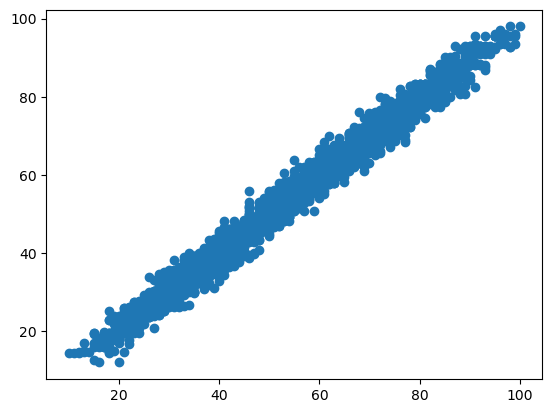

In [371]:
plt.scatter(y_test, predictions_tree)

<Axes: xlabel='Performance Index'>

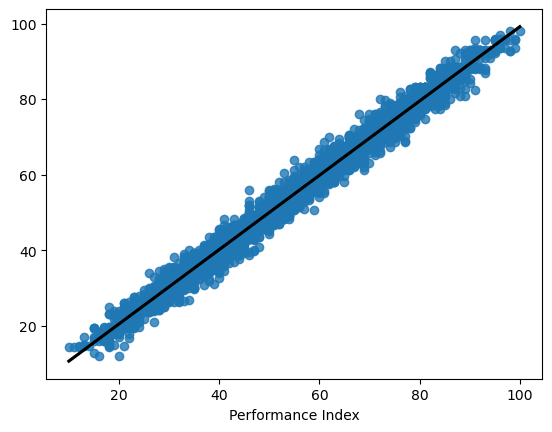

In [373]:
sns.regplot(x=y_test,y=predictions_tree,line_kws={"color":"black"})

<Axes: xlabel='Performance Index', ylabel='Density'>

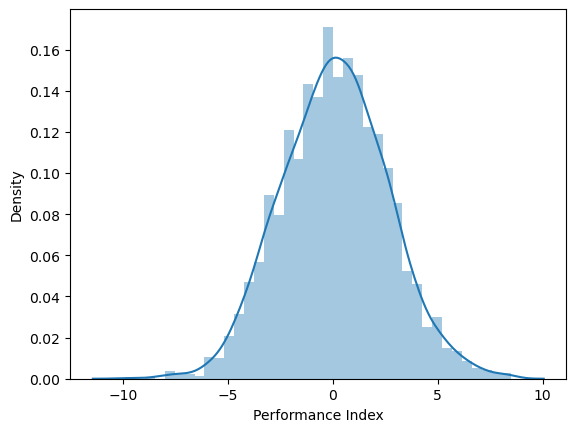

In [375]:
sns.distplot((y_test - predictions_tree))

In [377]:
results_df_dtr = pd.DataFrame(data=[["Decision Tree Regressor", 
                                 metrics.mean_absolute_error(y_test, predictions_tree), 
                                 metrics.mean_squared_error(y_test, predictions_tree), 
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_tree)),
                                 metrics.r2_score(y_test, predictions_tree)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2Score'])

In [379]:
results_df_dtr

,Model,MAE,MSE,RMSE,R2Score
0,Decision Tree Regressor,2.025061,6.495501,2.548627,0.982222


### Регрессия рандомного леса

In [382]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [383]:
pred_train_rfr = rfr.predict(X_train)
pred_test_rfr = rfr.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train_rfr):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test_rfr):.2f}')

Train R2 1.00
Test R2 0.98


In [386]:
pred_test_rfr

array([46.48773333, 81.122     , 60.64691667, ..., 25.9757    ,
       52.09066667, 64.85008333])

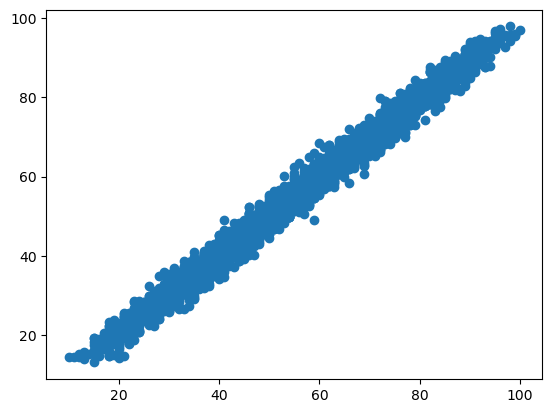

In [388]:
plt.scatter(y_test, pred_test_rfr)

<Axes: xlabel='Performance Index'>

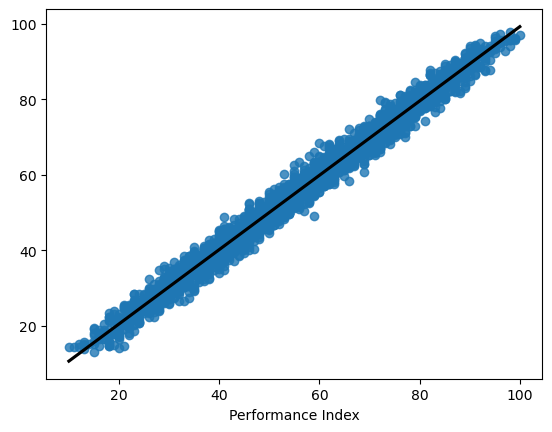

In [390]:
sns.regplot(x=y_test,y=pred_test_rfr,line_kws={"color":"black"})

<Axes: xlabel='Performance Index', ylabel='Density'>

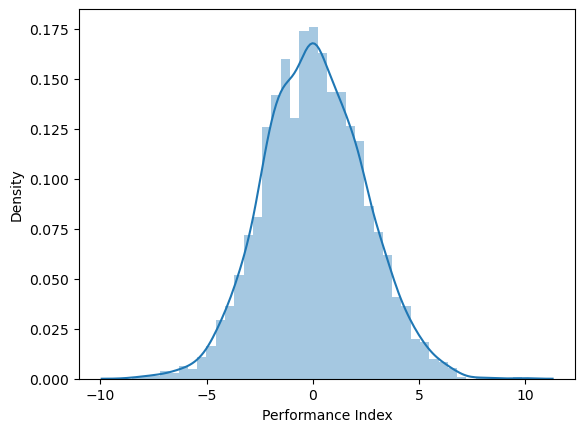

In [392]:
sns.distplot((y_test - pred_test_rfr))

In [394]:
results_df_rfr = pd.DataFrame(data=[["Random Forest Regressor", 
                                 metrics.mean_absolute_error(y_test, pred_test_rfr), 
                                 metrics.mean_squared_error(y_test, pred_test_rfr), 
                                 np.sqrt(metrics.mean_squared_error(y_test, pred_test_rfr)),
                                 metrics.r2_score(y_test, pred_test_rfr)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2Score'])

In [396]:
results_df_rfr

,Model,MAE,MSE,RMSE,R2Score
0,Random Forest Regressor,1.881556,5.587197,2.363725,0.984708


### Масштабирование данных - Нормализация

In [399]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [401]:
mms.transform(X_train)

array([[0.75      , 0.74576271, 1.        , 0.        , 0.33333333],
       [0.625     , 0.71186441, 1.        , 0.4       , 0.        ],
       [0.875     , 0.72881356, 0.        , 1.        , 0.66666667],
       ...,
       [0.5       , 0.93220339, 0.        , 0.2       , 0.66666667],
       [0.        , 0.11864407, 1.        , 1.        , 0.        ],
       [1.        , 0.74576271, 1.        , 0.8       , 0.55555556]])

In [403]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.750,0.745763,1.0,0.0,0.333333
1,0.625,0.711864,1.0,0.4,0.000000
2,0.875,0.728814,0.0,1.0,0.666667
3,0.625,0.338983,1.0,0.4,0.666667
4,0.250,0.915254,0.0,0.6,0.000000
...,...,...,...,...,...
6906,0.125,0.101695,1.0,0.4,0.555556
6907,1.000,0.338983,0.0,0.0,0.333333
6908,0.500,0.932203,0.0,0.2,0.666667
6909,0.000,0.118644,1.0,1.0,0.000000


In [405]:
X_train_norm.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000
mean,0.497504,0.497522,0.506584,0.508754,0.512066
std,0.323492,0.293920,0.499993,0.341076,0.318691
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.237288,0.000000,0.200000,0.222222
50%,0.500000,0.491525,1.000000,0.600000,0.555556
75%,0.750000,0.762712,1.000000,0.800000,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [407]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000
mean,0.502532,0.502455,0.501350,0.500675,0.502588
std,0.323995,0.293054,0.500083,0.335906,0.318270
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.254237,0.000000,0.200000,0.222222
50%,0.500000,0.500000,1.000000,0.600000,0.555556
75%,0.750000,0.762712,1.000000,0.800000,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Обучение модели на масштабированных данных

##### Линейная регрессия

In [411]:
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [413]:
pred_train_lrm = lrm.predict(X_train_norm)
pred_test_lrm = lrm.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train_lrm):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test_lrm):.2f}')

Train R2 0.99
Test R2 0.99


##### Дерево решений

In [416]:
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [418]:
pred_train_tree = tree.predict(X_train_norm)
pred_test_tree = tree.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train_tree):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test_tree):.2f}')

Train R2 0.99
Test R2 0.98


##### Регрессия рандомного леса

In [421]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train_norm, y_train)

RandomForestRegressor(n_estimators=1000)

In [423]:
pred_train_rfr = rfr.predict(X_train_norm)
pred_test_rfr = rfr.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train_rfr):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test_rfr):.2f}')

Train R2 1.00
Test R2 0.98


### Вывод

Был загружен дата сет состоящий из 10000  строк и 6 столбцов.
Выделена целевая переменная __Performance Index__. Данные были распределены неравномерно.

Была найдена зависимость между двумя признаками: Perfomance Index и Previous Scores. И слабая зависимость между Perfomance Index и Hours Studied.

Было построено и обучено 3 модели регресиии:  __LinearRegression, DecisionTreeRegressor и RandomForestRegressor.__
В дальнейшем была проведена нормализация данных и модели были переобучены.

Самый лучший результат выдает __RandomForestRegressor.__